In [90]:
import pandas as pd
import matplotlib.pyplot as plt 
import spacy
import ast
import numpy as np
from tqdm import tqdm
import re
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import seaborn as sns
nlp = spacy.load("en_core_web_sm")


In [82]:
recipe_df = pd.read_csv("data/JamieOliver_full.csv")


### Info about the recipe dataset

In [83]:
# Info about the recipe dataset
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   recipe_urls   1043 non-null   object
 1   recipe_name   742 non-null    object
 2   subheading    560 non-null    object
 3   serves        742 non-null    object
 4   cooking_time  707 non-null    object
 5   difficulty    742 non-null    object
 6   ingredients   1043 non-null   object
 7   diet          1043 non-null   object
 8   tags          1043 non-null   object
 9   description   602 non-null    object
 10  image_url     742 non-null    object
dtypes: object(11)
memory usage: 89.8+ KB


### Data Frame Shape

In [84]:
print('Shape: ', recipe_df.shape)

Shape:  (1043, 11)


### Missing Data

In [85]:
recipe_df.isna().sum()

recipe_urls       0
recipe_name     301
subheading      483
serves          301
cooking_time    336
difficulty      301
ingredients       0
diet              0
tags              0
description     441
image_url       301
dtype: int64

In [86]:
# Duplicated rows
print("duplicated rows in recipes dataset:", recipe_df.duplicated().sum())

duplicated rows in recipes dataset: 0


### Distribution of difficulty

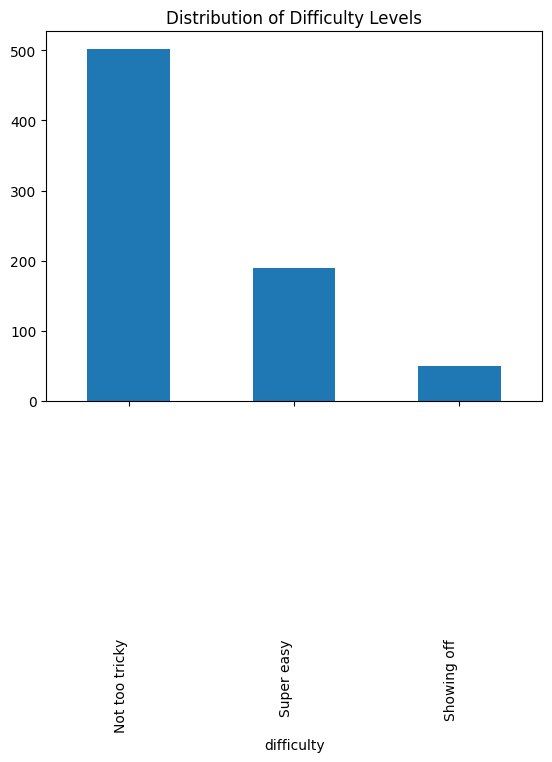

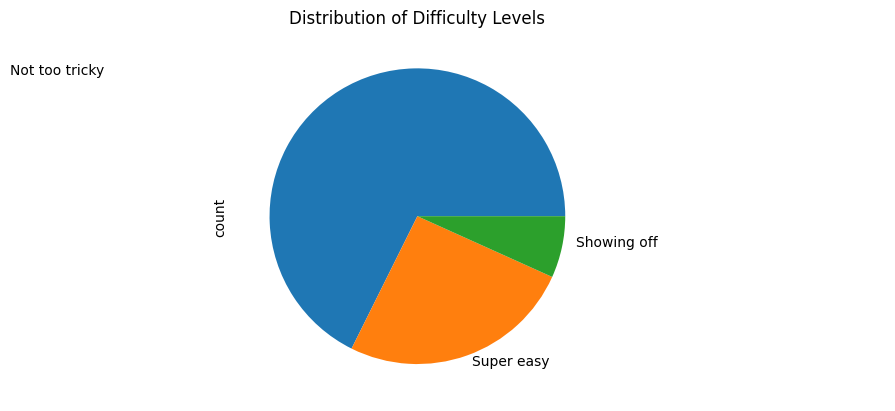

In [94]:
# Checking the distribution of 'difficulty'
recipe_df['difficulty'].value_counts().plot(kind='bar')
plt.title('Distribution of Difficulty Levels')
plt.show()

recipe_df['difficulty'].value_counts().plot(kind='pie')
plt.title('Distribution of Difficulty Levels')
plt.show()


### Distribution of Dietary Requirements

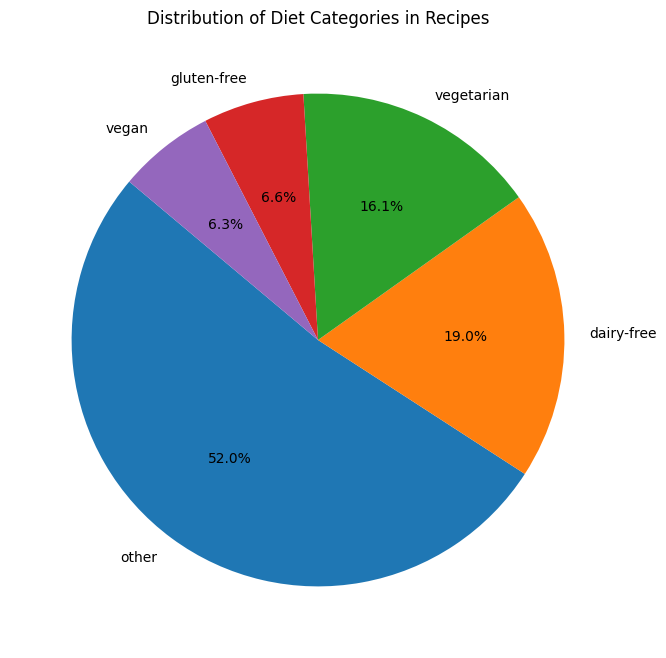

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named recipe_df and already loaded
# Convert the 'diet' column to lowercase to ensure consistency
recipe_df['diet'] = recipe_df['diet'].str.lower()

# Define the categories we're interested in
categories = ['vegan', 'vegetarian', 'dairy-free', 'gluten-free']

# Create a new column 'diet_category' with the category or 'other'
def categorize_diet(diet):
    for category in categories:
        if category in diet:
            return category
    return 'other'

# Apply the function to create the 'diet_category' column
recipe_df['diet_category'] = recipe_df['diet'].apply(categorize_diet)

# Count the occurrences of each category
diet_counts = recipe_df['diet_category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diet Categories in Recipes')
plt.show()
